# 1RA ENTREGA CURSO NLP & DEEP LEARNING

### importaciones de libreria

In [1]:
# Importar bibliotecas necesarias
import PyPDF2
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import PunktSentenceTokenizer
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import re

# Descargar recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### funcion de importacion

In [2]:
# Función para cargar el texto desde el PDF
def load_pdf(file_path):
    with open(file_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ""
        for page in reader.pages:
            page_text = page.extract_text()
            # Eliminar saltos de línea innecesarios
            page_text = re.sub(r'\n(?!\n)', ' ', page_text)
            # Eliminar espacios múltiples
            page_text = re.sub(r'\s+', ' ', page_text)
            text += page_text + " "  # Agregar doble salto de línea entre páginas
    return text.strip()

### importar corpus

In [3]:
# Cargar el texto del PDF
pdf_path = '2 MANERAS DE USAR MUESTREOS PEQUEÑOS PARA MEDIR ALGO.pdf'
texto_completo = load_pdf(pdf_path)

print("Texto cargado exitosamente. Primeras 200 caracteres:")
print(texto_completo[:200])

Texto cargado exitosamente. Primeras 200 caracteres:
by Joey Beachum | Nov 6, 2018 en www.hubbardresearch.com Cuando se trata de estadísticas, hay muchas ideas falsas flotando. Incluso las personas que tienen un background científico son susceptibles a 


# PREPROCESAMIENTO

### DEFINICION DE FUNCIONES DE PREPROCESAMIENTO

In [4]:
def preprocesar_texto(texto):
    # Tokenización
    tokens = word_tokenize(texto.lower())
    
    # Remoción de puntuación y números
    tokens = [token for token in tokens if token.isalpha()]
    
    # Remoción de stopwords
    stop_words = set(stopwords.words('spanish'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lematización
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return tokens

In [5]:
# Aplicar preprocesamiento al texto completo
tokens_procesados = preprocesar_texto(texto_completo)

# Estadísticas básicas
print(f"Número total de tokens: {len(tokens_procesados)}")
print(f"Número de tokens únicos: {len(set(tokens_procesados))}")

Número total de tokens: 978
Número de tokens únicos: 515


In [6]:
# Frecuencia de palabras
frecuencia_palabras = Counter(tokens_procesados)

# Top 15 palabras más frecuentes
print("\nTop 15 palabras más frecuentes:")
for palabra, freq in frecuencia_palabras.most_common(15):
    print(f"{palabra}: {freq}")

# Longitud promedio de las palabras
longitud_promedio = sum(len(token) for token in tokens_procesados) / len(tokens_procesados)
print(f"\nLongitud promedio de las palabras: {longitud_promedio:.2f} caracteres")

# Diversidad léxica (relación entre palabras únicas y total de palabras)
diversidad_lexica = len(set(tokens_procesados)) / len(tokens_procesados)
print(f"Diversidad léxica: {diversidad_lexica:.2f}")


Top 15 palabras más frecuentes:
muestra: 20
si: 16
urna: 15
minutos: 12
canicas: 12
incertidumbre: 11
tomar: 10
decisiones: 10
tiempo: 10
incluso: 9
persona: 9
información: 9
medir: 9
tamaño: 8
útil: 8

Longitud promedio de las palabras: 6.91 caracteres
Diversidad léxica: 0.53


In [7]:
# Palabras más largas
palabras_largas = sorted(set(tokens_procesados), key=len, reverse=True)[:10]
print("\nPalabras más largas:")
print(", ".join(palabras_largas))

# Crear un diccionario de frecuencias para palabras con más de una ocurrencia
freq_dict = {palabra: freq for palabra, freq in frecuencia_palabras.items() if freq > 1}


Palabras más largas:
significativamente, estadísticamente, respectivamente, específicamente, presentimiento, potencialmente, aleatoriamente, significación, significativo, anteriormente


### Visualizaciones

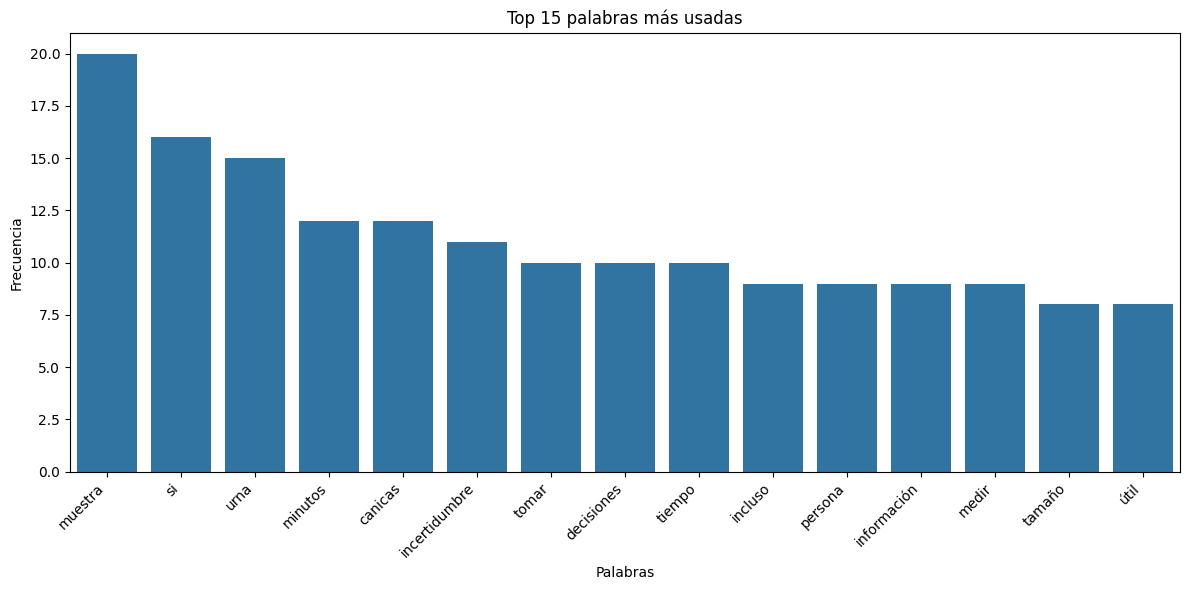

In [8]:
# Gráfico de barras de las top 15 palabras más usadas
plt.figure(figsize=(12, 6))
top_15 = dict(frecuencia_palabras.most_common(15))
sns.barplot(x=list(top_15.keys()), y=list(top_15.values()))
plt.title('Top 15 palabras más usadas')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

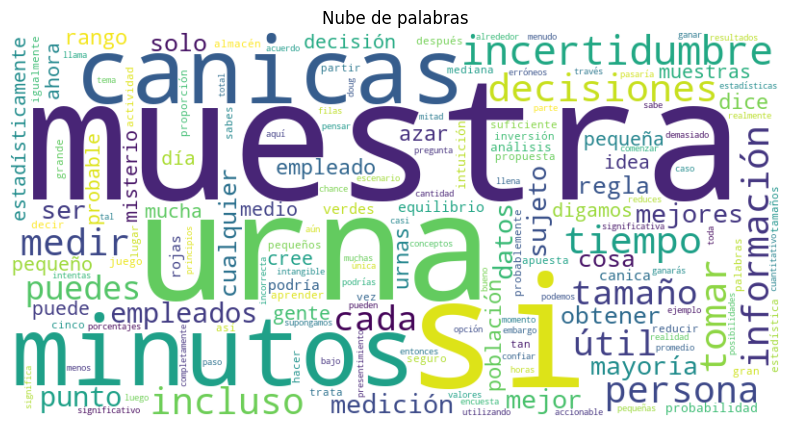

In [9]:
# Nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dict)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras')
plt.show()

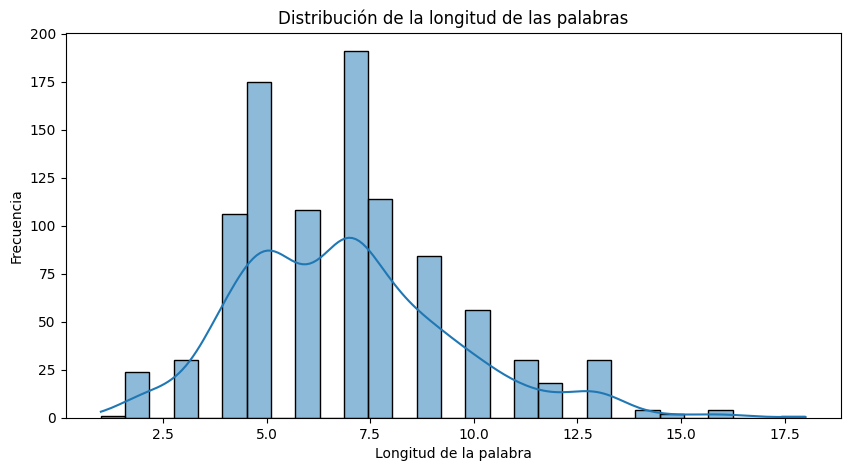

In [10]:
# Distribución de la longitud de las palabras
longitudes = [len(token) for token in tokens_procesados]
plt.figure(figsize=(10, 5))
sns.histplot(longitudes, kde=True)
plt.title('Distribución de la longitud de las palabras')
plt.xlabel('Longitud de la palabra')
plt.ylabel('Frecuencia')
plt.show()

# FUNCIONES AVANZADAS DE NLP

In [11]:
def analisis_sentimientos(texto):
    blob = TextBlob(texto)
    return blob.sentiment.polarity

def vectorizar_tfidf(textos):
    vectorizer = TfidfVectorizer()
    return vectorizer.fit_transform(textos)

In [12]:
# Análisis de sentimientos
sentimiento = analisis_sentimientos(texto_completo)
print(f"Polaridad del sentimiento del texto completo: {sentimiento}")

Polaridad del sentimiento del texto completo: 0.021428571428571415


In [13]:
def custom_sentence_tokenize(text):
    # Patrón para identificar URLs
    url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    
    # Patrón para identificar números decimales
    decimal_pattern = r'\d+[.,]\d+'
    
    # Reemplazar temporalmente URLs y números decimales
    urls = re.findall(url_pattern, text)
    decimals = re.findall(decimal_pattern, text)
    
    for i, url in enumerate(urls):
        text = text.replace(url, f'URL_PLACEHOLDER_{i}')
    
    for i, decimal in enumerate(decimals):
        text = text.replace(decimal, f'DECIMAL_PLACEHOLDER_{i}')
    
    # Tokenizar oraciones
    tokenizer = PunktSentenceTokenizer()
    sentences = tokenizer.tokenize(text)
    
    # Restaurar URLs y números decimales
    for i, sentence in enumerate(sentences):
        for j, url in enumerate(urls):
            sentence = sentence.replace(f'URL_PLACEHOLDER_{j}', url)
        for j, decimal in enumerate(decimals):
            sentence = sentence.replace(f'DECIMAL_PLACEHOLDER_{j}', decimal)
        sentences[i] = sentence
    
    return sentences


In [14]:
oraciones = custom_sentence_tokenize(texto_completo)

print("\nPrimeras 5 oraciones:")
for i, oracion in enumerate(oraciones[:5], 1):
    print(f"{i}. {oracion}")

# Verificación adicional
print("\nBuscando oraciones con URLs o números decimales:")
for i, oracion in enumerate(oraciones):
    if re.search(r'http[s]?://', oracion) or re.search(r'\d+[.,]\d+', oracion):
        print(f"{i+1}. {oracion}")


Primeras 5 oraciones:
1. by Joey Beachum | Nov 6, 2018 en www.hubbardresearch.com Cuando se trata de estadísticas, hay muchas ideas falsas flotando.
2. Incluso las personas que tienen un background científico son susceptibles a algunos de estos conceptos erróneos comunes.
3. Una idea errónea que afecta la medición en prácticamente todos los campos es la percepción de que se requiere una muestra de gran tamaño antes de poder obtener información útil de una medición.
4. Las mediciones a menudo se descartan, sin hacer ningún cálculo real, porque alguien cree que necesita un tamaño de muestra más grande para ser "estadísticamente significativo".
5. Vemos ejemplos de esta forma de pensar en todas partes.

Buscando oraciones con URLs o números decimales:
13. La regla de los cinco Imagina por un momento que eres el que toma las decisiones para una gran corporación con 10,000 empleados.
18. Podrias crear lo que esencialmente sería un censo en el que se encuesta a cada uno de los 10,000 emplea

In [15]:
# Vectorización TF-IDF
vectores_tfidf = vectorizar_tfidf(oraciones)

print("\nDimensiones de la matriz TF-IDF:")
print(vectores_tfidf.shape)


Dimensiones de la matriz TF-IDF:
(110, 642)


In [16]:
oraciones[75]

'Entonces, con más de 100 urnas, obtendrás alrededor de $ 500 - más o menos $ 100 - al final del juego.'

In [17]:
# Evaluación de la polaridad de las oraciones
polaridades = [analisis_sentimientos(oracion) for oracion in oraciones]

print("\nPolaridad de las primeras 5 oraciones:")
for i, pol in enumerate(polaridades[:5]):
    print(f"Oración {i+1}: {pol}")


Polaridad de las primeras 5 oraciones:
Oración 1: 0.0
Oración 2: 0.0
Oración 3: 0.0
Oración 4: 0.2
Oración 5: 0.0


In [18]:
# Identificar las oraciones más positivas y más negativas
indice_mas_positiva = np.argmax(polaridades)
indice_mas_negativa = np.argmin(polaridades)

print(f"\nOración más positiva (polaridad {polaridades[indice_mas_positiva]}):")
print(oraciones[indice_mas_positiva])

print(f"\nOración más negativa (polaridad {polaridades[indice_mas_negativa]}):")
print(oraciones[indice_mas_negativa])


Oración más positiva (polaridad 0.7):
Es decir, si el tiempo medio empleado es superior a 10 minutos, la inversión propuesta será mejor que el punto de equilibrio.

Oración más negativa (polaridad -0.75):
Eso significa que tu ganancia promedio por apuesta es de $ 5 (una probabilidad del 50% de perder $ 10 y el 50% de ganar $ 20 = (10,0002) (- 10) + (10,0002) (20) = 5).
